## Neural Network That will be implemented
![](images/Neural-Network.png)

## Forward Pass
![](images/Forward-Pass.png)

## Backpropagation
![](images/backpropagation.png)

In [681]:
import numpy as np
import matplotlib.pyplot as plt

In [682]:
class Dense:
    def __init__(self, prev_layer, current_layer):
        self.prev_layer = prev_layer
        self.current_layer = current_layer
        self.weights = np.ones((prev_layer, current_layer))
        self.bias=np.zeros(current_layer)

    def forward(self, x):
        self.input = x
        self.output = x@self.weights+self.bias
        return self.output
        
    def backward(self, grad_output, learning_rate):
        grad_weights = np.outer(self.input, grad_output)
        grad_bias = grad_output

        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias

        return grad_output @ self.weights.T

    def __call__(self):
        print(f"weights: {self.weights}\n bias: {self.bias}")

In [683]:
class Sigmoid_Activation:
    def activate(self, z):
        self.output = 1/(1+np.exp(-1*z))
        return self.output

    def backward(self, grad_output):
        return grad_output*self.output*(1-self.output)

In [684]:
dense_1 = Dense(2, 2)
sigmoid_1 = Sigmoid_Activation()
dense_2 = Dense(2, 1)
sigmoid_2 = Sigmoid_Activation()

In [685]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [686]:
learning_rate = 0.01
loss_record = []
epochs = 1000

for epoch in range(epochs):
    losses=0
    for obj,label in zip(x,y):
        z1 = dense_1.forward(obj)
        o1 = sigmoid_1.activate(z1)
        z2 = dense_2.forward(o1)
        o2 = sigmoid_2.activate(z2)
        error = label - o2
        loss = error**2 / 2
        losses += loss
        grad_output = -error
        grad_output = sigmoid_2.backward(grad_output) # error of last node
        grad_output = dense_2.backward(grad_output, learning_rate)
    
        grad_output = sigmoid_1.backward(grad_output)
        grad_output = dense_1.backward(grad_output, learning_rate)

    loss_record.append(losses)

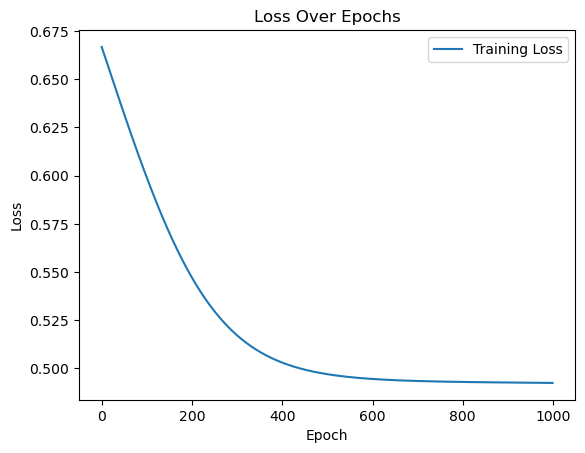

In [687]:
plt.plot(range(epochs), loss_record, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()